In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
def norm(x):
    return (x ** 2).sum() ** 0.5

In [3]:
# X - d x n
# y - 1 x n
# th - d x 1

def loss(X, y, th):
    return ((th.T.dot(X) - y) ** 2).mean()

In [4]:
# X - d x n
# y - 1 x n
# th - d x 1

def d_loss(X, y, th):
    n = X.shape[1]
    return 2 / n * X.dot((th.T.dot(X) - y).T)

In [5]:
# X - d x n
# y - 1 x n
# th - d x 1

def batch_sgd(X, y, f, df, th0, lam, b_size, epochs):
    fs = [f(X, y, th0)]
    ths = [th0]
    th = th0.copy()
    d = X.shape[0]
    n = X.shape[1]
    
    iters = np.array(range(n//b_size))
    
    for _ in range(epochs):
        np.random.shuffle(iters)
        for i in iters:
            X_b = X[:, i * b_size:(i+1)*b_size]
            y_b = y[:, i * b_size:(i+1)*b_size]
            th -= lam * df(X_b, y_b, th)
        fs.append(f(X, y, th))
        ths.append(th.copy())
        print(fs[-1])
        if norm(ths[-1] - ths[-2]) < 0.00001:
            break
    return fs, ths

In [6]:
data = pd.read_csv('Student_Performance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


Данные почти готовы к анализу, нужно лишь закодировать столбец <code>Extracurricular Activities</code>

In [8]:
data['Extracurricular Activities'].replace({'Yes':1, 'No':0}, inplace=True)

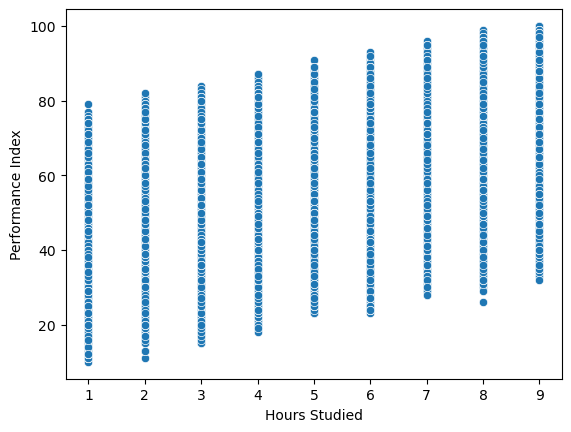

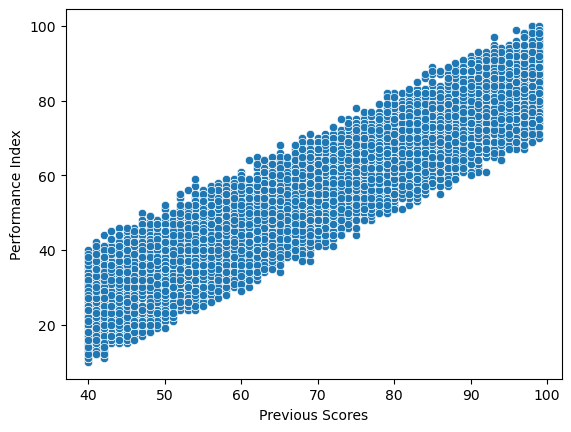

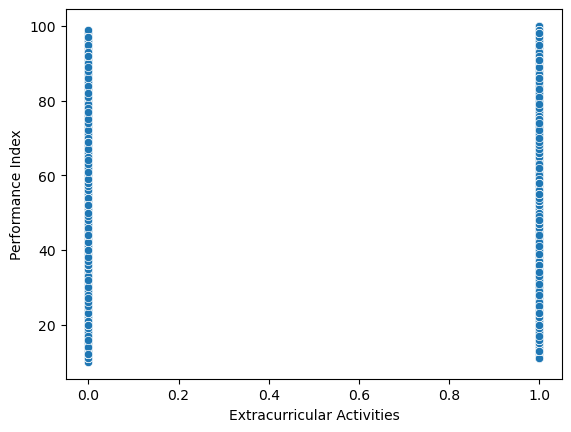

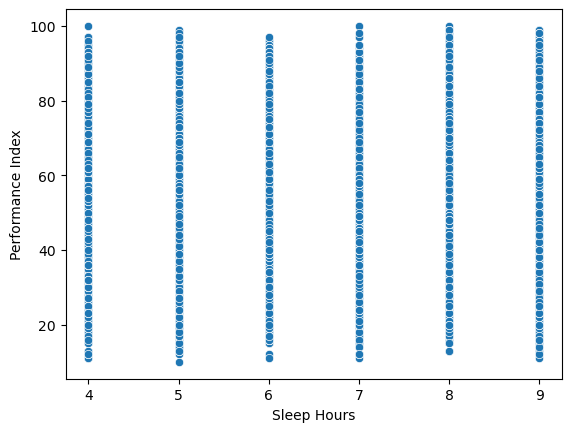

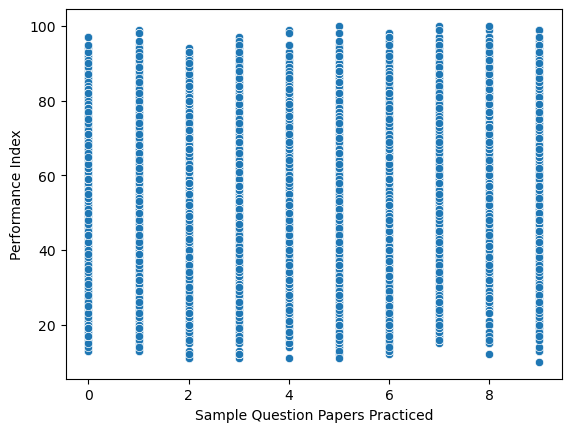

In [9]:
for factor in data.columns[:-1]:
    sns.scatterplot(data=data, x=factor, y=data.columns[-1])
    plt.show()

#### Данные фактически идеальны, выбросов не наблюдается

In [10]:
#target value
y = np.array(data)[:, -1].reshape(1, data.shape[0])

In [11]:
X = np.vstack([np.array(data)[:, :-1].T, np.ones(data.shape[0])])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X.T, y[0], test_size=0.33, random_state=42)
#Приводим данные к необходимому для batch_sgd
X_train, X_test, y_train, y_test = X_train.T, X_test.T, y_train.reshape(1, y_train.shape[0]), y_test.reshape(1, y_test.shape[0])

In [13]:
th0 = np.zeros(X.shape[0]).reshape(X.shape[0], 1)

In [14]:
fs, ths = batch_sgd(X_train, y_train, loss, d_loss, th0, 0.0001, 32, 4096)

58.48444273663951
53.59473880085078
43.57918735581208
40.184027581416615
38.62204890233746
36.30660569706686
38.35890161406342
36.43366402849258
34.17940015290796
34.882071308502695
33.578907859319315
33.84892062501564
33.9439368135629
32.948810336838775
33.52039558838784
33.09277164768801
33.71779158831209
35.82530338268827
33.21137472130922
32.899110118447034
32.57539458865061
32.27565807917195
34.365906500303346
34.1565209691571
32.12948712111361
32.37785819463731
32.03163533589975
34.57584046501403
32.1755077895565
32.848722578846846
31.8430735794732
31.69078486393117
32.36979764113215
32.28895824915047
31.557286661425927
32.66956753493117
33.22008355463179
33.51193754306991
33.38852892366192
33.255330051438165
31.915769683201667
31.081616433942628
30.95693101721654
31.63090544272698
30.88405193120175
30.746777423883564
30.930953442163126
31.274266932948308
31.291623369814925
30.507374832190845
31.296162476368465
31.317498600884143
30.71298665897362
30.54424866889649
31.16410626185

15.830195124714628
16.120462404664043
15.410789526601832
17.111597510176423
15.706849932797006
15.483217138084608
15.285123286200674
15.289133202807045
15.22090643263312
15.267243114240346
15.300982177991617
15.542474553019062
15.160787381073964
15.39273596047773
15.102159816626598
17.764556802277113
15.053741751653803
15.021388765940026
15.413181651465065
15.510652019144787
15.343165997565244
14.948000366091316
14.902127860560189
15.363455802290062
14.897302277017513
18.00760459321015
14.865393962579047
14.979421533454131
15.419769497999287
16.48499785799752
14.726445568470796
16.10533612976837
19.133998809268768
14.921022675542472
15.000708001336136
14.857697496214238
16.17004338257387
16.041047617506628
15.492602917779035
16.351656902023578
14.5314223132728
14.90281339050304
14.618057420503407
14.695564504007274
14.407973222824294
14.386144613115915
14.664602075014376
14.376261691288926
14.331278304182877
14.357184766242971
14.600569774679242
14.438902890090002
17.899898718487794
14

8.63710892382911
8.346443446863438
8.489561997223033
8.31708631327568
8.485295439775964
8.297623253374494
8.383367777280192
8.284004699690513
8.270946678042451
8.267768099909716
8.840584517036852
8.450974999283202
8.603999335970926
8.292301035617482
8.396908480794925
8.210787394716242
8.475464574451221
8.341562233673148
8.216019688557541
8.58784338398079
8.251403662181511
8.165494991626568
8.589955380530425
8.231889126902926
8.148578852761041
8.126917469663628
8.501092383443687
8.615664247959497
8.198606249802495
8.179093067282198
8.24898643058296
8.096226152751878
8.278714700004656
8.599079836265853
8.105203490247073
8.949008922016775
9.407589796961847
8.049640860351223
8.319571614653382
8.284614564801437
8.191598432472833
8.004896199461939
8.421353585492401
8.029822817740119
8.027886605639273
9.769095323964851
8.330786220734776
8.018062036351463
8.214958285550315
8.00779545450543
8.041298752105241
7.917534112627856
8.047870357833656
8.062877442768057
7.965929136726292
7.8983962551822

5.914613681018679
6.317159653216663
6.091488183492004
5.7495349882312015
5.710680288638209
5.8420291870182215
5.721859355147052
5.829742208730608
5.939001506484039
5.715195371104325
5.700672966961476
5.698820936602773
5.772446474466943
5.807036838404909
5.752930889004577
5.681980548343824
5.752593741521112
5.6791282145669095
5.671626449168704
5.749916342590014
5.910521579437026
5.943877268700977
5.700015562332405
5.672710937983425
5.963388818377189
6.289023362431662
5.644085388405966
6.128140016073711
5.640172484364875
5.762316620253828
6.017324311488439
5.6246832893805125
5.6426872572864175
5.621846961335432
5.6246247940772465
5.8627352294431985
5.632054302155596
5.776650514822333
5.973779649156442
5.650178028113882
5.599753270374835
5.822649398571614
5.660962944605102
5.614728455761846
5.587465993124553
6.053784802357181
5.579944918988848
5.84746751334496
5.639724154222975
5.7376498046239846
5.61073800204587
5.836868819648696
5.709585728449489
5.566834102497856
5.863217528041697
5.55

4.853846644515129
4.971477287096304
5.3533184661993145
4.781276570613035
4.911042877880906
4.908729227775493
4.767739859719583
4.8333949245717776
4.858948802730092
4.913129998343592
4.847393533290174
4.838929475769211
4.773501573658471
4.781340606674764
4.957123213372871
4.77382784365727
4.757449201242499
4.8086830451332165
4.8238665620251915
4.751117956547739
4.840607766403605
4.7539540839081935
4.789677402864345
4.795092570388569
4.8677305215864495
5.139807644251777
4.743970251424226
4.746212205826054
4.775834826300452
4.754853397078696
4.739951166216224
4.810374218518773
5.153271619071598
4.902578976280095
4.872278605618831
5.146147922165299
4.73611916923047
4.966090092945181
4.733065852584946
4.726504409656136
4.730804173249321
4.855115866752418
4.993877605623715
4.727948811956625
4.785619930369174
5.159137901206792
4.77412204235274
4.719908531141204
4.938179544314174
4.80360329367486
5.759820394215765
5.04070623810749
4.889253481103897
4.974452758214361
4.786318316936645
5.7314611

4.637445234651248
4.939800421378173
4.433645957065789
4.414218522749148
4.41255395064862
4.476518821185417
4.5270843344431935
4.531483780287994
4.53321775829515
4.746181005039567
4.515119734654302
4.466862106566417
4.8277694761050505
4.752124820222434
4.417644885148731
4.449944746987703
4.426572665673609
4.5456665676668555
4.467255176236554
4.432952649022798
4.68288755180761
4.405495930221704
4.418704828067776
4.481989850855224
4.697447956371947
4.462205926553184
4.506558348469884
4.4495053872867985
4.7957174766852155
4.455231964873192
4.814610315681475
4.467446110470884
4.418866359285709
4.684414307799994
4.400862488330137
4.400230767982815
4.546686549527522
4.661291272360396
4.416743956294137
4.4574758532388605
4.493908212288684
4.425587596864486
4.39595862234084
4.402576797535546
4.502146498774104
4.438713368775114
4.437721668502212
4.393857439422503
4.728718607534995
4.4433352390933445
4.655189879648555
4.553701568182157
4.392532355382687
4.422243265085805
4.738027270661021
4.62545

4.484848948259374
4.750271311486485
4.294729865148634
4.307217151523786
4.281296718681638
4.673157717862691
4.572770768730245
4.322262245898296
4.682152425877648
4.374829443822112
4.319601536841577
4.275062217889682
4.375103858891666
4.281112471344878
4.280351454013561
4.34397365039564
4.309840673668868
4.5689059555553655
4.5977187762541645
4.332839354776142
4.279860266711847
4.791770232879879
4.342713293941035
4.277851516728304
4.294812623349536
4.279036421975852
4.307956680923761
4.277410384862983
4.641385989260794
4.466175714249633
4.377163785869909
4.310641714183104
4.315548220466191
4.2974965938568985
4.2886992593578155
4.271500950734313
4.500751847014675
4.450928836690404
4.502009224110636
4.287350685004202
4.7096907026445365
4.8284650870314545
4.935027107308836
4.740917098166374
4.5031563721144785
4.472118014813255
4.302837770456974
4.270337232650363
5.034425057566098
4.584149101841488
4.302471323779092
4.267845093189475
4.310664393619346
4.2715201837808054
4.267242356906497
4.2

4.452231881605169
4.236589957772101
4.270478736609498
4.441344888648544
4.977984953170597
4.225940313674073
4.250999750864182
4.385090780015417
4.4290818195082595
4.62481174859528
4.524368778138509
4.225982545613145
4.23898360962165
4.231971731304016
4.60434448778895
4.884776835093898
4.238784708933722
4.356332160312046
4.229124064125358
4.372643328755932
4.436668618416008
4.225015817397045
4.3655318750927785
4.264912455407111
4.260997555770986
4.229499217088875
4.42588901568039
4.240203643143005
4.392169052836652
4.225110260818588
4.289430615443766
4.361778695817576
4.426156978113587
4.594662526459798
4.297670599290785
4.238272499199968
4.224025111927745
4.3197250882609906
4.349471969505256
4.344331250992228
4.223726166600512
4.44260585278722
4.349506767798963
4.26993256290756
4.238539282545387
4.343043889838118
4.249284898044429
4.503288893630958
4.321851344686488
4.2237167167104674
4.2591148893884485
4.461572111509072
4.38588060518563
4.22666916067544
4.4999050690276965
4.2406962249

4.272146287053697
4.260630716925906
4.234067100319938
4.463268035661106
4.3990669661837165
4.3530760702138975
4.210647120147068
4.44804100513517
4.231637128930381
4.243684282784259
4.252265707486143
4.210511664328323
4.652557485621998
4.377498535747919
4.211210142646493
4.449827942238229
4.215864715523243
4.227343314967511
4.210939196850166
4.648815728759289
4.207812338553129
4.642549403115166
4.207161375530462
4.208982999273281
4.209643030919548
4.324588331894668
4.513588546330334
4.26630897233222
4.243308154251869
4.2126370414177154
4.920608782360679
4.446537233770235
4.533177183062273
4.2551241129032755
4.262174404192257
4.44924995303709
4.2761723726403975
4.323998039649884
4.2285576477151485
4.920224478849948
4.538032383788481
4.38112345432762
4.862695198517471
4.401355920099795
4.265004761222079
4.269981919966005
4.213755881615726
4.579698587382188
4.22496963319618
4.271561213294171
4.252721340531043
4.206194681900199
4.211851016418109
4.224376214501679
4.2114422112110805
4.267598

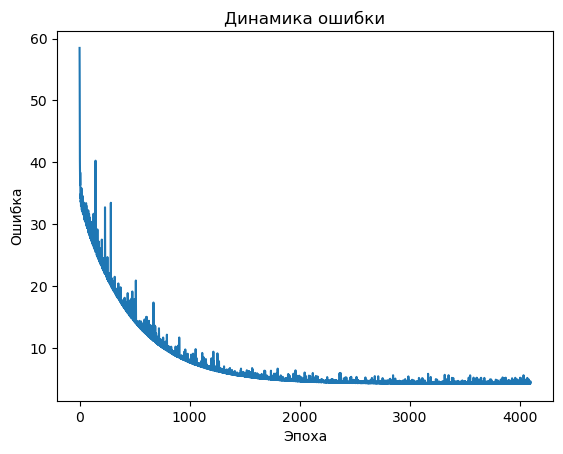

In [15]:
plt.plot(list(range(len(fs[1:]))), fs[1:])
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.title('Динамика ошибки')

plt.show()

In [16]:
reg = LinearRegression()

In [17]:
reg.fit(X_train.T, y_train.T)

LinearRegression()

In [18]:
reg.score(X_test.T, y_test.T)

0.989010089843778

#### R^2 для обычной линейной регрессии фантастически хорош - 0.989

In [19]:
ths_reg = reg.coef_.T
ths_reg[-1] = reg.intercept_

In [20]:
y_pred_sgd = ths[-1].T.dot(X_test)
y_pred_sgd

array([[54.28207069, 22.40329834, 47.53463495, ..., 42.78768684,
        70.85357935, 42.74903519]])

In [21]:
y_pred_reg = ths_reg.T.dot(X_test)
y_pred_reg

array([[54.75354173, 22.60032219, 47.92590021, ..., 43.12654287,
        71.56089039, 43.10599732]])

In [22]:
#R^2 для линенйой регрессии через batch_sgd
1 - ((y_pred_sgd - y_test) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

0.9883928963117747

In [23]:
loss(X_test, y_test, ths[-1])

4.30174246294714

In [24]:
#R^2 для линейной регрессии
1 - ((y_pred_reg - y_test) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

0.989010089843778

In [25]:
loss(X_test, y_test, ths_reg)

4.073002572635982

#### Градиентный спуск очень близок к библиотечной реализации LinearRegression

In [26]:
ths_reg

array([[  2.85764503],
       [  1.01557179],
       [  0.58292387],
       [  0.47910642],
       [  0.1852281 ],
       [-33.8124448 ]])

In [27]:
ths[-1]

array([[  2.84878971],
       [  1.00633891],
       [  0.55532915],
       [  0.45303023],
       [  0.1783639 ],
       [-33.38023201]])

In [28]:
print("При увеличении переменной на 1, значение результата изменится на:")
for name, num in zip(data.columns[:-1], ths[-1][:-1]):
    print(f'{name}: {round(num[0],3)}')

При увеличении переменной на 1, значение результата изменится на:
Hours Studied: 2.849
Previous Scores: 1.006
Extracurricular Activities: 0.555
Sleep Hours: 0.453
Sample Question Papers Practiced: 0.178
